<a href="https://colab.research.google.com/github/anaghck/OIBSIP/blob/master/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/customer_shopping_data.csv')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [12]:
pd.concat([df.head(3), df.tail(3)])

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [13]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [14]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,datetime64[ns]
shopping_mall,object


# Statistical View Of the numerical Data

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,99457.0,43.427089,18.0,30.0,43.0,56.0,69.0,14.990054
quantity,99457.0,3.003429,1.0,2.0,3.0,4.0,5.0,1.413025
price,99457.0,689.256321,5.23,45.45,203.3,1200.32,5250.0,941.184567
invoice_date,99457,2022-02-04 02:46:59.783424,2021-01-01 00:00:00,2021-07-19 00:00:00,2022-02-05 00:00:00,2022-08-22 00:00:00,2023-03-08 00:00:00,NaN


# Statistical View Of the Object Data

In [16]:
df.describe(include = 'object').T

,count,unique,top,freq
invoice_no,99457,99457,I232867,1
customer_id,99457,99457,C273973,1
gender,99457,2,Female,59482
category,99457,8,Clothing,34487
payment_method,99457,3,Cash,44447
shopping_mall,99457,10,Mall of Istanbul,19943


In [17]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

# Missing Values

In [18]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [19]:
df[df.isnull().any(axis=1)]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [20]:
#fill missing values
df['category'] = df['category'].fillna(df['category'].mode()[0])
df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])
df['shopping_mall'] = df['shopping_mall'].fillna(df['shopping_mall'].mode()[0])

In [21]:
#fill missing values for numeric column
df['quantity'] = df['quantity'].fillna(df['quantity'].median())
df['price'] = df['price'].fillna(df['price'].median())


In [22]:
#fill missing values for date
df['invoice_date'] = df['invoice_date'].ffill()



In [23]:
df.isnull().sum()


,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [24]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

In [25]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n", df[col].value_counts(), "\n" + "***" * 5)


invoice_no:
 invoice_no
I232867    1
I887161    1
I522661    1
I161104    1
I662891    1
          ..
I227836    1
I337046    1
I173702    1
I127801    1
I317333    1
Name: count, Length: 99457, dtype: int64 
***************
customer_id:
 customer_id
C273973    1
C137631    1
C776199    1
C363191    1
C180055    1
          ..
C657758    1
C189076    1
C988172    1
C266599    1
C111565    1
Name: count, Length: 99457, dtype: int64 
***************
gender:
 gender
Female    59482
Male      39975
Name: count, dtype: int64 
***************
category:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64 
***************
payment_method:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64 
***************
shopping_mall:
 shopping_mall
Mall of Istanbul     19943

In [26]:
# Column Standardization Process
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


#Time Series Analysis

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall    month  total_amount  \
0    Credit Card   2022-08-05          Kanyon  2022-08       7502.00   
1     Debit Card   2021-12-12  Forum Istanbul  2021-12       5401.53   
2           Cash   2021-11-09       Metrocity  2021-11        300.08   
3    Credit Card   2021-05-16    Metropol AVM  2021-05      15004.25   
4           Cash   2021-10-24          Kanyon  2021-10        242.40   

   total_sales  Total Amount  
0      7502.00       7502.00  
1      5401.53       5401.53  
2       300.08        300.08  
3     15004.25      15

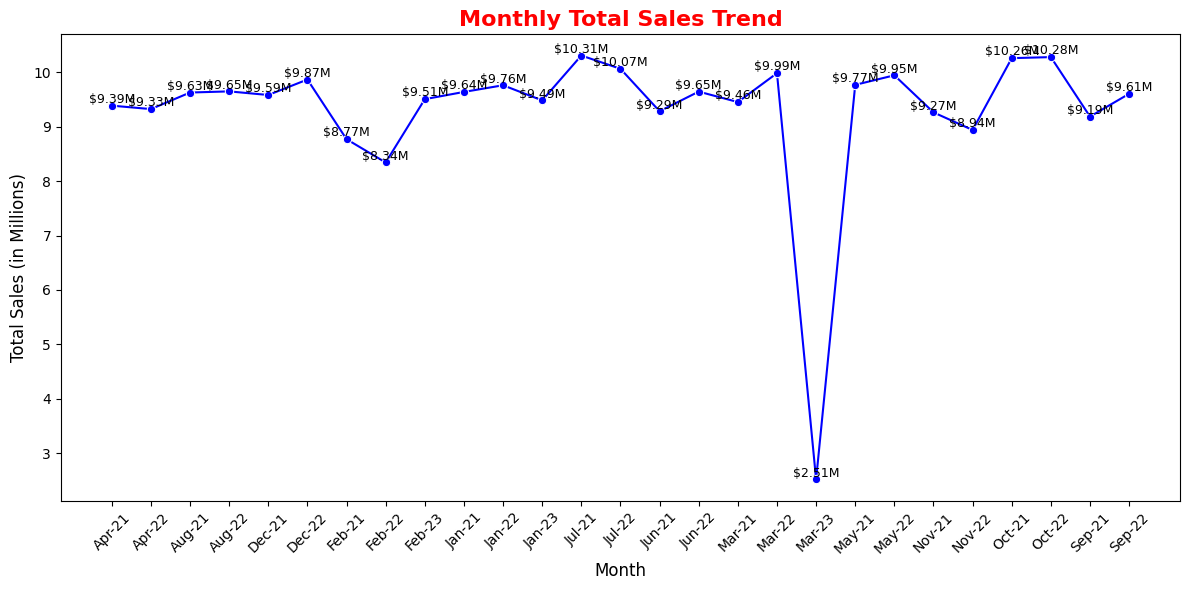

In [41]:
# Create Total Amount column
df['Total Amount'] = df['quantity'] * df['price']

# Check the first 5 rows to confirm
print(df.head())


# Ensure invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Extract Month (as name) and add a new column
df['Month'] = df['invoice_date'].dt.strftime('%b-%y')  # Example: Jan-23


# Step 1: Group data by Month and calculate Total Sales
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# Step 2: Convert sales to millions for better readability
monthly_sales['Total Amount'] = monthly_sales['Total Amount'] / 1_000_000  # in Millions

# Step 3: Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o', color='blue')

# Step 4: Add title and labels
plt.title("Monthly Total Sales Trend", fontsize=16, color='red', weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (in Millions)", fontsize=12)

# Step 5: Rotate x-axis labels
plt.xticks(rotation=45)

# Step 6: Add data labels
for i in range(len(monthly_sales)):
    plt.text(i, monthly_sales['Total Amount'][i] + 0.05,
             f"${monthly_sales['Total Amount'][i]:.2f}M",
             ha='center', fontsize=9)

# Step 7: Make layout tight
plt.tight_layout()
plt.show()
